<a href="https://colab.research.google.com/github/ljmachado/MITxT-14.750x/blob/main/Homework7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyreadr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.9/440.9 kB 7.3 MB/s eta 0:00:00


In [2]:
import pyreadr
data = pyreadr.read_r('votingData.RData')
data = data['votingData']
data

,county,year,campaignDonation,votePercent
rownames,,,,
1,1.0,1.0,50.296246,0.383584
2,1.0,2.0,50.477089,0.381302
3,1.0,3.0,51.753368,0.404665
4,1.0,4.0,51.742126,0.388278
5,1.0,5.0,51.685909,0.408477
...,...,...,...,...
996,100.0,6.0,46.417210,0.411708
997,100.0,7.0,48.223499,0.440578
998,100.0,8.0,50.813251,0.474402


In [3]:
from statsmodels.formula.api import ols

model = ols('votePercent ~ campaignDonation', data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            votePercent   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                 1.062e+04
Date:                Sat, 28 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:29:09   Log-Likelihood:                 1934.6
No. Observations:                1000   AIC:                            -3865.
Df Residuals:                     998   BIC:                            -3855.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.0079      0.004    234.052      0.000       0.999       1.016
campaignDonation    -0.0120      0.000   -103.076      0.000      -0.012      -0.012
==============================================================================
Omnibus:                        0.370   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.831   Jarque-Bera (JB):                0.401
Skew:                          -0.046   Prob(JB):                        0.818
Kurtosis:                       2.965   Cond. No.                         144.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
data['campaignDonation'].std()

9.480500886426547

In [5]:
data['campaignDonation'].std()*-0.0120

-0.11376601063711857

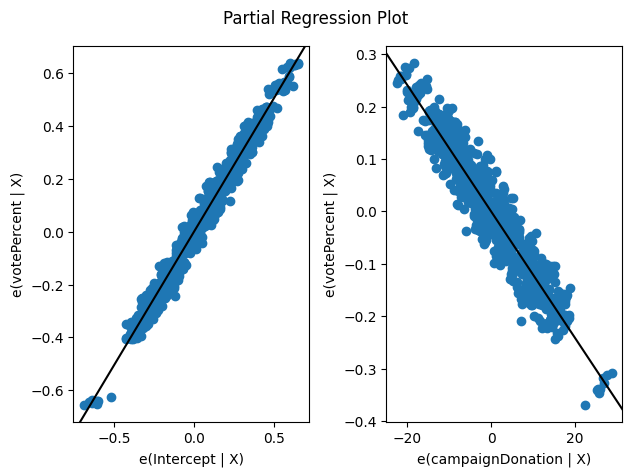

In [6]:
import statsmodels.api as sm
fig = sm.graphics.plot_partregress_grid(model)
fig.tight_layout(pad=1.0)

In [8]:
model = ols('votePercent ~ C(county) + campaignDonation', data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            votePercent   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     2514.
Date:                Sat, 28 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:44:56   Log-Likelihood:                 3525.6
No. Observations:                1000   AIC:                            -6849.
Df Residuals:                     899   BIC:                            -6353.
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.2441      0.010    -25.469      0.000      -0.263      -0.225
C(county)[T.2.0]       0.1286      0.004     36.714      0.000       0.122       0.135
C(county)[T.3.0]       0.2915      0.004     72.990      0.000       0.284       0.299
C(county)[T.4.0]       0.4310      0.005     92.692      0.000       0.422       0.440
C(county)[T.5.0]       0.8141      0.007    117.494      0.000       0.800       0.828
C(county)[T.6.0]       0.8226      0.007    119.855      0.000       0.809       0.836
C(county)[T.7.0]       0.2944      0.004     73.312      0.000       0.287       0.302
C(county)[T.8.0]       0.3603      0.004     83.660      0.000       0.352       0.369
C(county)[T.9.0]       0.6749      0.006    115.122      0.000       0.663       0.686
C(county)[T.10.0]      0.8402      0.007    118.234      0.000       0.826       0.854
C(county)[T.11.0]      0.4839      0.005    100.092      0.000       0.474       0.493
C(county)[T.12.0]      0.0239      0.003      7.102      0.000       0.017       0.031
C(county)[T.13.0]      0.1268      0.004     35.891      0.000       0.120       0.134
C(county)[T.14.0]      0.2772      0.004     69.324      0.000       0.269       0.285
C(county)[T.15.0]      0.0507      0.003     14.951      0.000       0.044       0.057
C(county)[T.16.0]      0.0800      0.003     23.268      0.000       0.073       0.087
C(county)[T.17.0]      0.2440      0.004     63.181      0.000       0.236       0.252
C(county)[T.18.0]      0.4371      0.005     94.063      0.000       0.428       0.446
C(county)[T.19.0]      0.2731      0.004     69.916      0.000       0.265       0.281
C(county)[T.20.0]      0.3592      0.004     83.112      0.000       0.351       0.368
C(county)[T.21.0]      0.6813      0.006    110.606      0.000       0.669       0.693
C(county)[T.22.0]      0.1659      0.004     46.149      0.000       0.159       0.173
C(county)[T.23.0]      0.4930      0.005     99.739      0.000       0.483       0.503
C(county)[T.24.0]      0.5512      0.005    105.087      0.000       0.541       0.562
C(county)[T.25.0]      0.2533      0.004     64.726      0.000       0.246       0.261
C(county)[T.26.0]      0.6601      0.006    110.972      0.000       0.648       0.672
C(county)[T.27.0]     -0.0132      0.003     -3.932      0.000      -0.020      -0.007
C(county)[T.28.0]      0.0914      0.003     26.402      0.000       0.085       0.098
C(county)[T.29.0]      0.6166      0.006    110.071      0.000       0.606       0.628
C(county)[T.30.0]      0.1803      0.004     49.831      0.000       0.173       0.187
C(county)[T.31.0]      0.7503      0.006    116.065      0.000       0.738       0.763
C(county)[T.32.0]      0.3578      0.004     83.176      0.000       0.349       0.366
C(county)[T.33.0]      0.1954      0.0

In [9]:
data['campaignDonation'].std()*model.params['campaignDonation']

0.11824754156598755

In [13]:
round(data['campaignDonation'].std()*model.params['campaignDonation']*100,2)

11.82

In [63]:
county_means = data.groupby('county')['votePercent','campaignDonation'].mean().reset_index().set_index('county')
county_means = county_means.to_dict(orient='index')
#county_means.set_index('county').to_dict(orient='index')

<ipython-input-63-4261e64a41b1>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  county_means = data.groupby('county')['votePercent','campaignDonation'].mean().reset_index().set_index('county')


In [66]:
data['campaignDonation_dm_county'] = data.apply(lambda x: x['campaignDonation'] - county_means[x['county']]['campaignDonation'],axis=1)
data['votePercent_dm_county'] = data.apply(lambda x: x['votePercent'] - county_means[x['county']]['votePercent'],axis=1)

In [67]:
data

,county,year,campaignDonation,votePercent,campaignDonation_dm_county,votePercent_dm_county
rownames,,,,,,
1,1.0,1.0,50.296246,0.383584,-0.844309,-0.010151
2,1.0,2.0,50.477089,0.381302,-0.663466,-0.012432
3,1.0,3.0,51.753368,0.404665,0.612814,0.010930
4,1.0,4.0,51.742126,0.388278,0.601572,-0.005457
5,1.0,5.0,51.685909,0.408477,0.545354,0.014743
...,...,...,...,...,...,...
996,100.0,6.0,46.417210,0.411708,-2.161736,-0.030489
997,100.0,7.0,48.223499,0.440578,-0.355446,-0.001619
998,100.0,8.0,50.813251,0.474402,2.234306,0.032204


In [68]:
model = ols('votePercent_dm_county ~ campaignDonation_dm_county', data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     votePercent_dm_county   R-squared:                       0.840
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     5238.
Date:                   Sat, 28 Oct 2023   Prob (F-statistic):               0.00
Time:                           22:52:45   Log-Likelihood:                 3525.6
No. Observations:                   1000   AIC:                            -7047.
Df Residuals:                        998   BIC:                            -7037.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                  -1.487e-18      0.000   -6.6e-15      1.000      -0.000       0.000
campaignDonation_dm_county     0.0125      0.000     72.371      0.000       0.012       0.013
==============================================================================
Omnibus:                        2.155   Durbin-Watson:                   2.244
Prob(Omnibus):                  0.340   Jarque-Bera (JB):                2.031
Skew:                          -0.045   Prob(JB):                        0.362
Kurtosis:                       2.799   Cond. No.                         1.31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""